In [24]:
# Install the required libraries
!pip install prophet

In [25]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
from prophet import Prophet
from bokeh.io import output_notebook
import matplotlib.pyplot as plt

%matplotlib inline

In [26]:
# # Upload the scarf-google-trends-data.csv file
# from google.colab import files

# uploaded = files.upload()

In [27]:
# Read the data from the scarf-google-trends-data.csv file into a Pandas DataFrame
df_alpaca = pd.read_csv("../Resources/scarf-google-trends-data.csv")

# Review the DataFrame
df_alpaca.head()

,week,canada,uruguay
0,11/8/15,74,17
1,11/15/15,81,17
2,11/22/15,94,17
3,11/29/15,92,0
4,12/6/15,87,18


In [28]:
# Plot the general trends
df_alpaca.plot()

<Axes: >

In [29]:
# Create a DataFrame for Canada to include the week and canada columns
CA_df = df_alpaca[["canada", "week"]]

# Rename the columns to the Prophet model syntax
CA_df = CA_df.rename({"canada": "y", "week": "ds"}, axis="columns")

# Review the Canada DataFrame
CA_df

,y,ds
0,74,11/8/15
1,81,11/15/15
2,94,11/22/15
3,92,11/29/15
4,87,12/6/15
...,...,...
255,33,9/27/20
256,38,10/4/20
257,43,10/11/20
258,42,10/18/20


In [30]:
# Create a DataFrame for Uruguay to include the week and uruguay columns
UR_df = df_alpaca[["uruguay", "week"]]

# Rename the columns to the Prophet model syntax
UR_df = UR_df.rename({"uruguay": "y", "week": "ds"}, axis="columns")

# Review the Uruguay DataFrame
UR_df

,y,ds
0,17,11/8/15
1,17,11/15/15
2,17,11/22/15
3,0,11/29/15
4,18,12/6/15
...,...,...
255,14,9/27/20
256,15,10/4/20
257,15,10/11/20
258,14,10/18/20


In [31]:
# Create a Prophet model for Canada
canada_model = Prophet()

In [32]:
# Create a Prophet model for Uruguay
uruguay_model = Prophet()

In [33]:
# Fit the Canada Prophet model
canada_model.fit(CA_df[["y", "ds"]])

/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1133: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.history_dates = pd.to_datetime(pd.Series(history['ds'].unique(), name='ds')).sort_values()
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:287: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ds'] = pd.to_datetime(df['ds'])
22:34:00 - cmdstanpy - INFO - Chain [1] start processing
22:34:00 - cmdstanpy - INFO - Chain [1] done processing


In [34]:
# Fit the Uruguay Prophet model
uruguay_model.fit(UR_df[["y", "ds"]])

/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1133: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.history_dates = pd.to_datetime(pd.Series(history['ds'].unique(), name='ds')).sort_values()
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:287: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ds'] = pd.to_datetime(df['ds'])
22:34:00 - cmdstanpy - INFO - Chain [1] start processing
22:34:00 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
# Forecast one year of weekly future trends data for Canada
future_canada = canada_model.make_future_dataframe(periods=10)

# Display the last five rows of the future_canada DataFrame
future_canada.tail()

,ds
265,2020-10-31
266,2020-11-01
267,2020-11-02
268,2020-11-03
269,2020-11-04


In [36]:
# Forecast one year of weekly future trends data for Uruguay
future_uruguay = uruguay_model.make_future_dataframe(periods=10)

# Display the last five rows of the future_uruguay DataFrame
future_uruguay.tail()

,ds
265,2020-10-31
266,2020-11-01
267,2020-11-02
268,2020-11-03
269,2020-11-04


In [37]:
# Make predictions for Canada using the future_canada DataFrame
forecast_canada = canada_model.predict(future_canada)

# Display the first five rows of the forecast_canada DataFrame
forecast_canada.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-11-08,46.042200,67.713612,81.066370,46.042200,46.042200,28.548056,28.548056,28.548056,28.548056,28.548056,28.548056,0.0,0.0,0.0,74.590256
1,2015-11-15,45.945981,72.499277,85.160409,45.945981,45.945981,32.940642,32.940642,32.940642,32.940642,32.940642,32.940642,0.0,0.0,0.0,78.886624
2,2015-11-22,45.849763,75.704909,88.354664,45.849763,45.849763,36.026183,36.026183,36.026183,36.026183,36.026183,36.026183,0.0,0.0,0.0,81.875946
3,2015-11-29,45.753544,78.574290,90.845599,45.753544,45.753544,38.867068,38.867068,38.867068,38.867068,38.867068,38.867068,0.0,0.0,0.0,84.620612
4,2015-12-06,45.657326,81.277465,94.071117,45.657326,45.657326,41.703221,41.703221,41.703221,41.703221,41.703221,41.703221,0.0,0.0,0.0,87.360547


In [38]:
# Make predictions for Uruguay using the future_uruguay DataFrame
forecast_uruguay = canada_model.predict(future_uruguay)


# Display the first five rows of the forecast_uruguay DataFrame
forecast_uruguay.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-11-08,46.042200,68.436523,81.392481,46.042200,46.042200,28.548056,28.548056,28.548056,28.548056,28.548056,28.548056,0.0,0.0,0.0,74.590256
1,2015-11-15,45.945981,72.349448,85.186030,45.945981,45.945981,32.940642,32.940642,32.940642,32.940642,32.940642,32.940642,0.0,0.0,0.0,78.886624
2,2015-11-22,45.849763,75.970045,88.320973,45.849763,45.849763,36.026183,36.026183,36.026183,36.026183,36.026183,36.026183,0.0,0.0,0.0,81.875946
3,2015-11-29,45.753544,77.877633,90.536944,45.753544,45.753544,38.867068,38.867068,38.867068,38.867068,38.867068,38.867068,0.0,0.0,0.0,84.620612
4,2015-12-06,45.657326,81.297010,93.406521,45.657326,45.657326,41.703221,41.703221,41.703221,41.703221,41.703221,41.703221,0.0,0.0,0.0,87.360547


/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


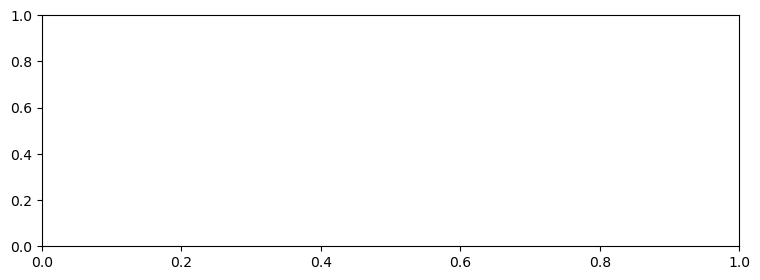

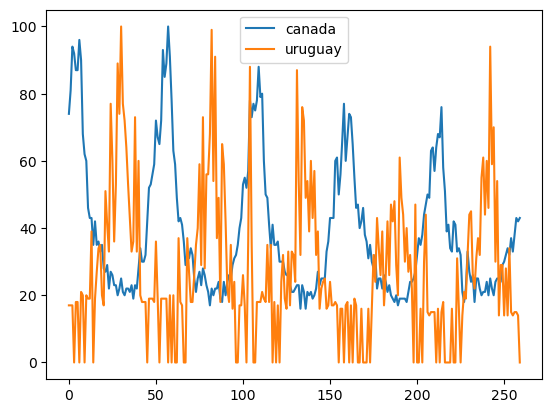

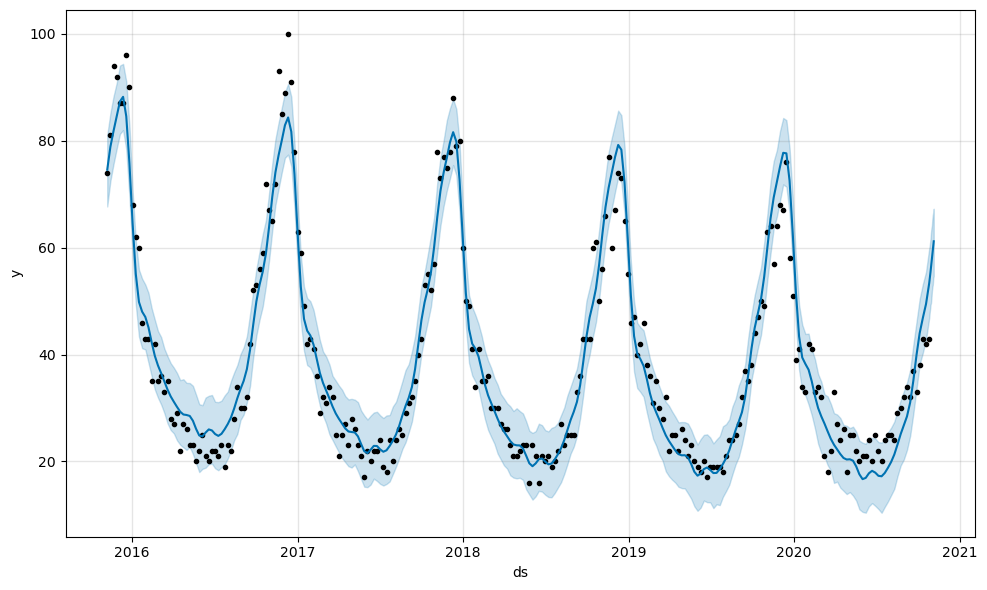

In [39]:
# Plot the Prophet predictions for Canada
plot_canada = canada_model.plot(forecast_canada)
plt.show()

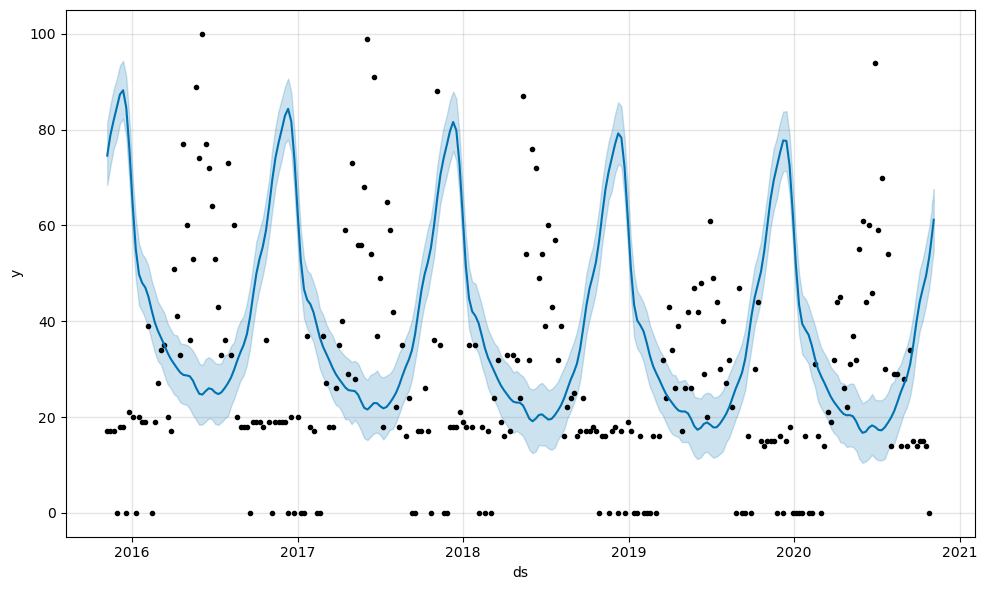

In [40]:
# Plot the Prophet predictions for Uruguay
plot_uruguay = uruguay_model.plot(forecast_uruguay)
plt.show()

In [41]:
# Set the index in the forecast_canada DataFrame to the ds datetime column


# Display the forecast_canada DataFrame
forecast_canada.sample(n=5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
212,2019-12-01,35.465732,68.802293,81.846131,35.465732,35.465732,39.720276,39.720276,39.720276,39.720276,39.720276,39.720276,0.0,0.0,0.0,75.186008
194,2019-07-28,35.787388,13.380745,26.575589,35.787388,35.787388,-16.264578,-16.264578,-16.264578,-16.264578,-16.264578,-16.264578,0.0,0.0,0.0,19.522811
80,2017-05-21,40.296072,16.685779,29.516334,40.296072,40.296072,-17.044401,-17.044401,-17.044401,-17.044401,-17.044401,-17.044401,0.0,0.0,0.0,23.251671
79,2017-05-14,40.352358,18.187896,31.093462,40.352358,40.352358,-15.658236,-15.658236,-15.658236,-15.658236,-15.658236,-15.658236,0.0,0.0,0.0,24.694121
132,2018-05-20,37.857250,14.780996,27.520492,37.857250,37.857250,-16.772942,-16.772942,-16.772942,-16.772942,-16.772942,-16.772942,0.0,0.0,0.0,21.084308


In [42]:
# Plot predictions for our forecast_canada DataFrame for the 52 week period
# forecast_canada = canada_model.make_future_dataframe(periods=7, freq="W")

In [43]:
# Set the index in the forecast_uruguay DataFrame to the ds datetime column
forecast_uruguay.set_index("ds")

# Display the forecast_uruguay DataFrame
forecast_uruguay.sample(n=5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
14,2016-02-14,44.695141,35.974336,48.486472,44.695141,44.695141,-2.388966,-2.388966,-2.388966,-2.388966,-2.388966,-2.388966,0.0,0.0,0.0,42.306174
23,2016-04-17,43.829176,23.090209,35.420410,43.829176,43.829176,-14.522959,-14.522959,-14.522959,-14.522959,-14.522959,-14.522959,0.0,0.0,0.0,29.306218
114,2018-01-14,38.668787,38.433241,51.196272,38.668787,38.668787,6.092574,6.092574,6.092574,6.092574,6.092574,6.092574,0.0,0.0,0.0,44.761361
129,2018-04-29,37.990717,17.100876,29.605423,37.990717,37.990717,-14.970989,-14.970989,-14.970989,-14.970989,-14.970989,-14.970989,0.0,0.0,0.0,23.019728
253,2020-09-13,35.219311,24.386124,37.424443,35.219311,35.219311,-4.192111,-4.192111,-4.192111,-4.192111,-4.192111,-4.192111,0.0,0.0,0.0,31.027200


In [44]:
# Plot predictions for our forecast_uruguay DataFrame for the 52 week period
# forecast_uruguay = uruguay_model.make_future_dataframe(periods=7, freq="W")

In [45]:
forecast_canada

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-11-08,46.042200,67.713612,81.066370,46.042200,46.042200,28.548056,28.548056,28.548056,28.548056,28.548056,28.548056,0.0,0.0,0.0,74.590256
1,2015-11-15,45.945981,72.499277,85.160409,45.945981,45.945981,32.940642,32.940642,32.940642,32.940642,32.940642,32.940642,0.0,0.0,0.0,78.886624
2,2015-11-22,45.849763,75.704909,88.354664,45.849763,45.849763,36.026183,36.026183,36.026183,36.026183,36.026183,36.026183,0.0,0.0,0.0,81.875946
3,2015-11-29,45.753544,78.574290,90.845599,45.753544,45.753544,38.867068,38.867068,38.867068,38.867068,38.867068,38.867068,0.0,0.0,0.0,84.620612
4,2015-12-06,45.657326,81.277465,94.071117,45.657326,45.657326,41.703221,41.703221,41.703221,41.703221,41.703221,41.703221,0.0,0.0,0.0,87.360547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,2020-10-31,35.178097,51.856472,64.137112,35.178097,35.178097,22.748491,22.748491,22.748491,22.748491,22.748491,22.748491,0.0,0.0,0.0,57.926588
266,2020-11-01,35.177239,52.641182,65.381650,35.177239,35.177239,23.569909,23.569909,23.569909,23.569909,23.569909,23.569909,0.0,0.0,0.0,58.747148
267,2020-11-02,35.176380,53.098839,66.143144,35.176380,35.176380,24.393933,24.393933,24.393933,24.393933,24.393933,24.393933,0.0,0.0,0.0,59.570313
268,2020-11-03,35.175522,54.302388,66.680603,35.175522,35.175522,25.214909,25.214909,25.214909,25.214909,25.214909,25.214909,0.0,0.0,0.0,60.390431


/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call 

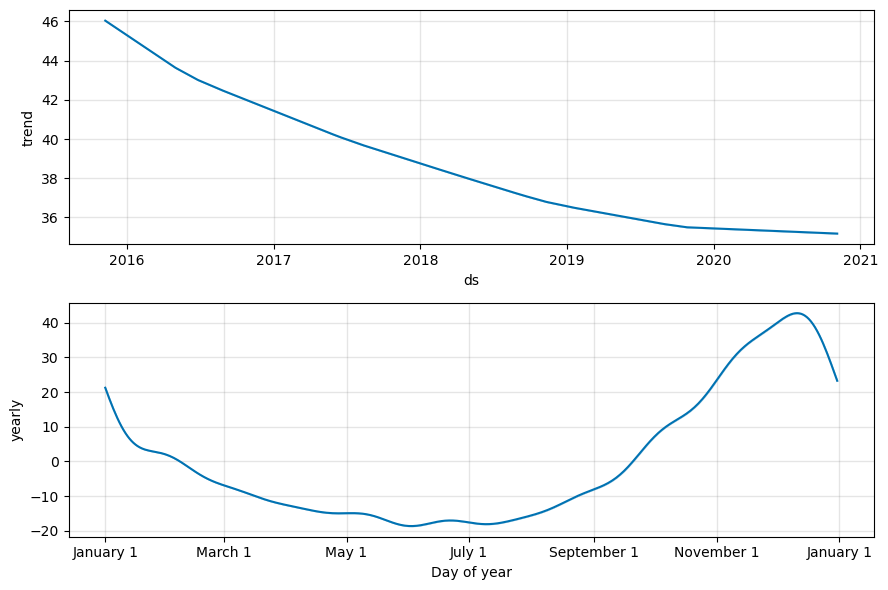

In [46]:
# Reset the index in the forecast_canada DataFrame
forecast_canada.reset_index()

# Use the plot_components function to visualize the forecast results
# for the forecast_canada DataFrame
ca_comps = canada_model.plot_components(forecast_canada)
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call 

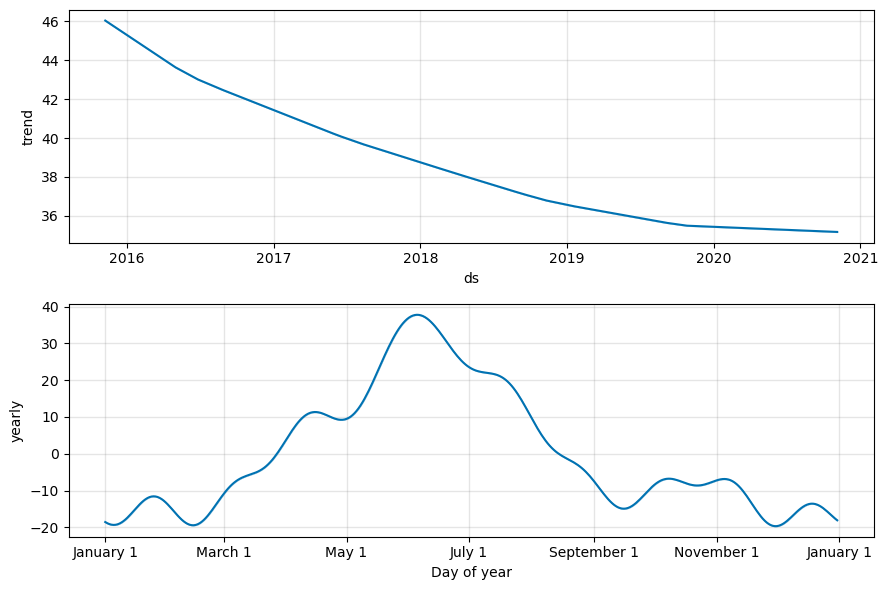

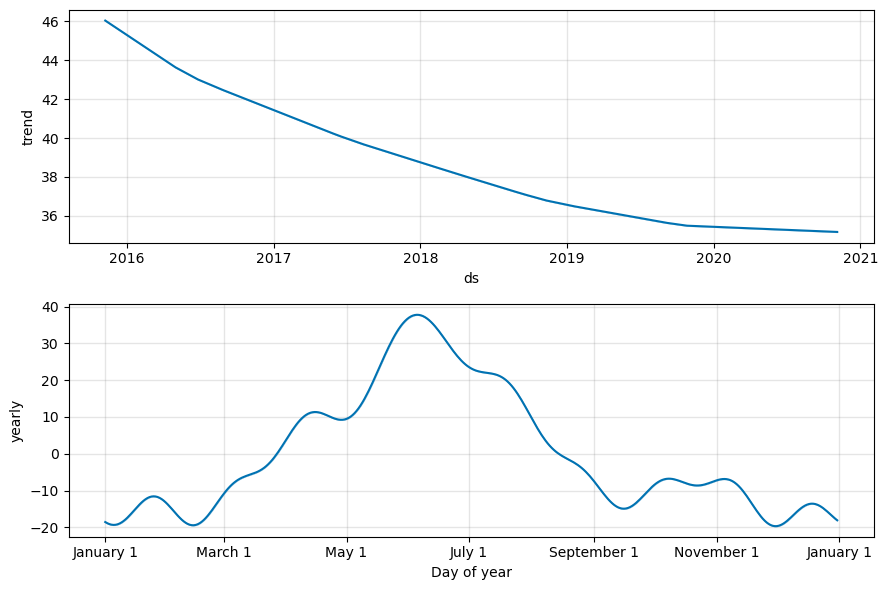

In [48]:
# Reset the index in the forecast_uruguay DataFrame
forecast_uruguay.reset_index(drop=True)

# Use the plot_components function to visualize the forecast results
# for the forecast_uruguay DataFrame
ur_comps = uruguay_model.plot_components(forecast_uruguay)
plt.show()